**documentation video**: https://youtu.be/FrbG4ooRx6I

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [2]:
cocktail = pd.read_csv("./data.csv")
print("Successfully Imported Data!")
cocktail.head()

Successfully Imported Data!


,Fruit quality,fixed acidity,citric acid,Percentage of sweeteners,chlorides,Calories,density,pH,sulphates,quality
0,9.4,7.4,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,5
1,9.8,7.8,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,5
2,9.8,7.8,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,5
3,9.8,11.2,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,6
4,9.4,7.4,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,5


In [3]:
print(cocktail.shape)

(1277, 10)


# Description

In [4]:
cocktail.describe(include='all')

,Fruit quality,fixed acidity,citric acid,Percentage of sweeteners,chlorides,Calories,density,pH,sulphates,quality
count,1277.000000,1277.000000,1277.000000,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,10.400783,8.578622,0.289499,2.562725,0.08885,15.469851,0.996973,3.299773,0.663931,5.663273
std,1.096360,1.770116,0.196475,1.312806,0.04794,10.320646,0.001894,0.155250,0.174171,0.812909
min,8.400000,4.600000,0.000000,0.900000,0.01200,1.000000,0.990070,2.740000,0.330000,3.000000
25%,9.500000,7.300000,0.120000,1.900000,0.07100,7.000000,0.995900,3.200000,0.560000,5.000000
50%,10.100000,8.200000,0.280000,2.200000,0.08000,13.000000,0.997000,3.300000,0.620000,6.000000
75%,11.100000,9.600000,0.450000,2.600000,0.09200,21.000000,0.998030,3.400000,0.730000,6.000000
max,14.900000,15.900000,1.000000,15.500000,0.61100,72.000000,1.003200,3.900000,2.000000,8.000000


## Z-score method to remove outliers

In [60]:
from scipy import stats
# Creating the DataFrame
df = pd.DataFrame(cocktail)

# Calculating z-scores
z_scores = stats.zscore(df)

# Setting a threshold for outliers
threshold = 3

# Filtering out rows with z-scores beyond the threshold
cocktail = df[(z_scores < threshold).all(axis=1)]

print(cocktail)

      Fruit quality  fixed acidity  citric acid  Percentage of sweeteners  \
0               9.4            7.4         0.00                       1.9   
1               9.8            7.8         0.00                       2.6   
2               9.8            7.8         0.04                       2.3   
3               9.8           11.2         0.56                       1.9   
4               9.4            7.4         0.00                       1.9   
...             ...            ...          ...                       ...   
1271           11.7            7.3         0.20                       1.6   
1272           11.2            5.9         0.00                       1.9   
1273            9.3            7.5         0.20                       2.0   
1274           11.2            7.8         0.13                       2.1   
1275            9.5            8.0         0.22                       2.3   

      chlorides  Calories  density    pH  sulphates  quality  goodquality  

# Finding Null Values

In [6]:
print(cocktail.isna().sum())

Fruit quality               0
fixed acidity               0
citric acid                 0
Percentage of sweeteners    0
chlorides                   0
Calories                    0
density                     0
pH                          0
sulphates                   0
quality                     0
dtype: int64


<Axes: >

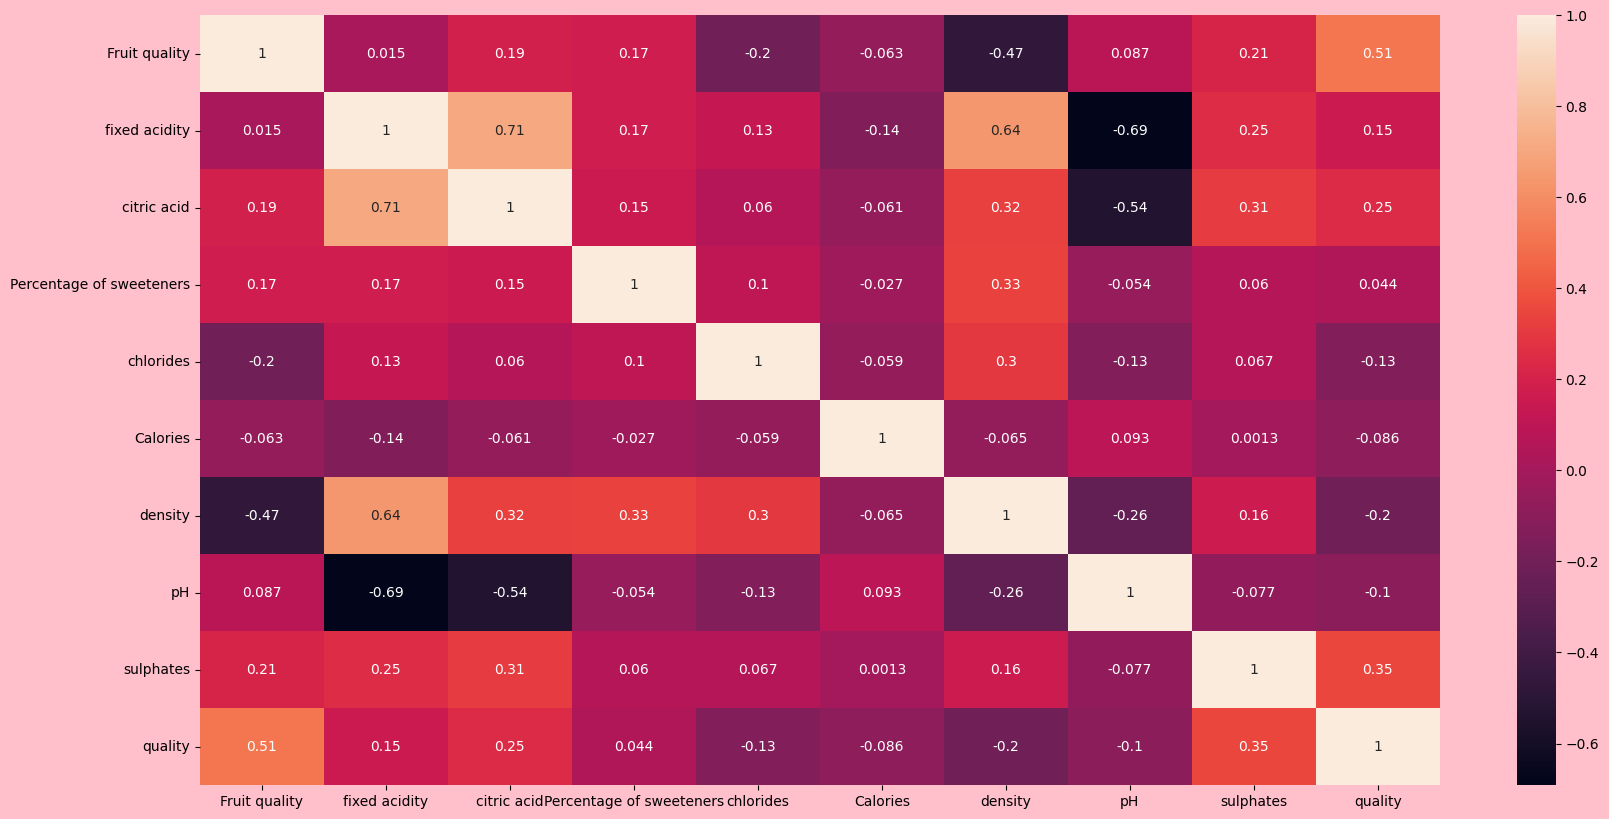

In [7]:
corr = cocktail.corr()
# creat heatmap of correlation
plt.figure(figsize = [20, 10], facecolor = 'pink')
sns.heatmap(corr, annot = True)

In [8]:
cocktail.groupby('quality').mean()

,Fruit quality,fixed acidity,citric acid,Percentage of sweeteners,chlorides,Calories,density,pH,sulphates
quality,,,,,,,,,
3,9.800000,9.620000,0.318000,2.690000,0.120000,12.000000,0.998808,3.380000,0.618000
4,10.171795,8.148718,0.164103,2.543590,0.082077,13.000000,0.996711,3.368974,0.577436
5,9.852419,8.303427,0.249194,2.415625,0.085302,15.822581,0.997279,3.310706,0.602077
6,10.551820,8.735118,0.294540,2.336617,0.083154,14.718415,0.996898,3.298951,0.663704
7,11.508642,8.972840,0.376543,2.637037,0.076883,12.561728,0.996107,3.288827,0.732654
8,12.076923,9.376923,0.448462,2.853846,0.072077,12.076923,0.995878,3.222308,0.746154


# Data Analysis

## Countplot:

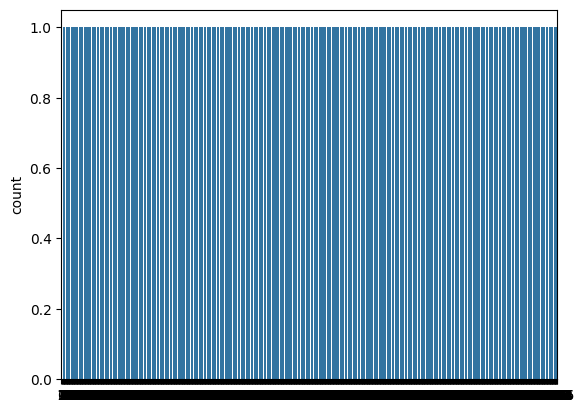

In [9]:
sns.countplot(cocktail['quality'])
plt.show()

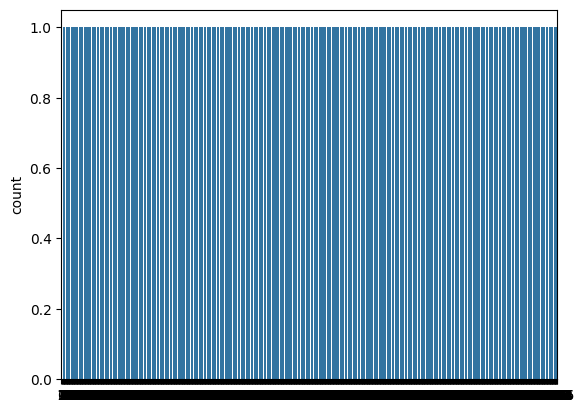

In [10]:
sns.countplot(cocktail['pH'])
plt.show()

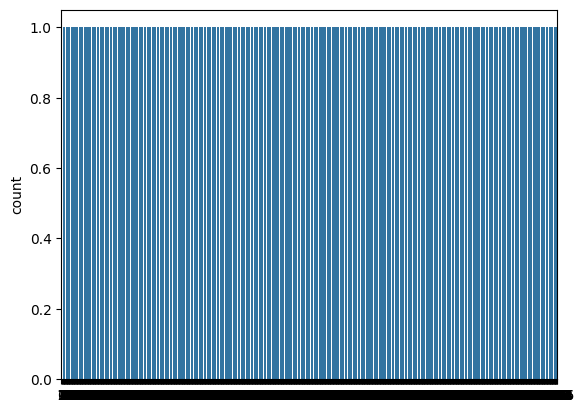

In [11]:
sns.countplot(cocktail['fixed acidity'])
plt.show()

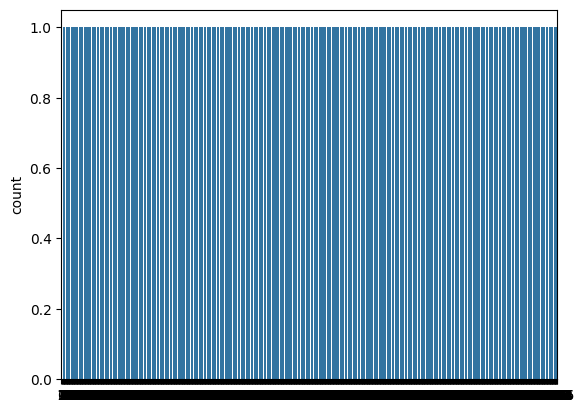

In [12]:
sns.countplot(cocktail['citric acid'])
plt.show()

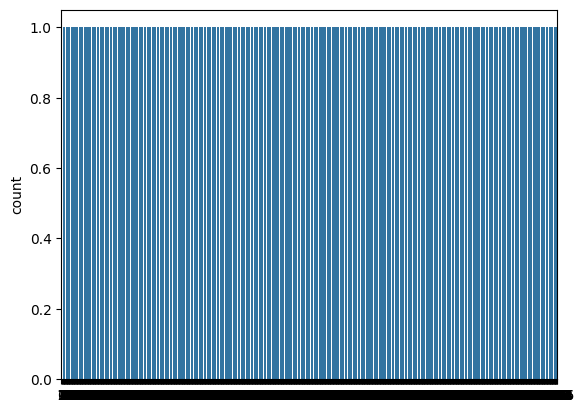

In [13]:
sns.countplot(cocktail['density'])
plt.show()

## KDE plot:

<Axes: xlabel='quality', ylabel='Density'>

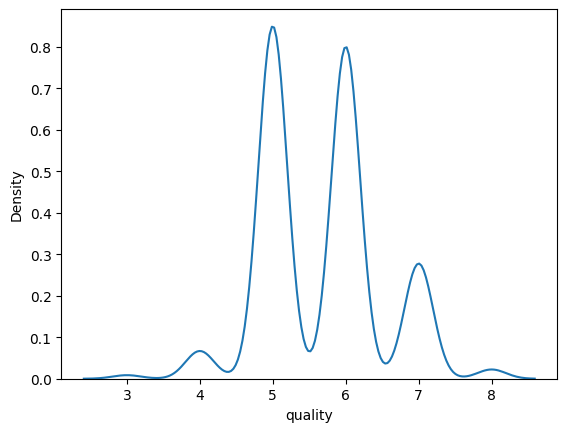

In [14]:
sns.kdeplot(cocktail.query('quality > 2').quality)

## Distplot:

Fruit quality                  Axes(0.125,0.712609;0.168478x0.167391)
fixed acidity               Axes(0.327174,0.712609;0.168478x0.167391)
citric acid                 Axes(0.529348,0.712609;0.168478x0.167391)
Percentage of sweeteners    Axes(0.731522,0.712609;0.168478x0.167391)
chlorides                      Axes(0.125,0.511739;0.168478x0.167391)
Calories                    Axes(0.327174,0.511739;0.168478x0.167391)
density                     Axes(0.529348,0.511739;0.168478x0.167391)
pH                          Axes(0.731522,0.511739;0.168478x0.167391)
sulphates                       Axes(0.125,0.31087;0.168478x0.167391)
quality                      Axes(0.327174,0.31087;0.168478x0.167391)
dtype: object

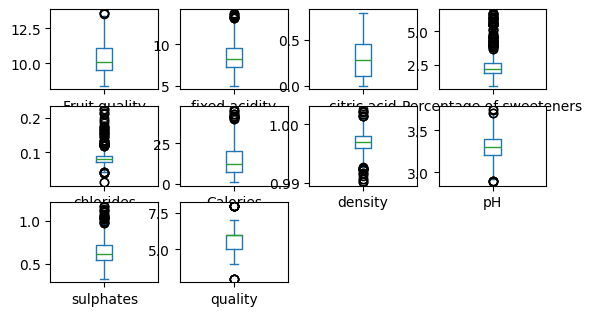

In [15]:
cocktail.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

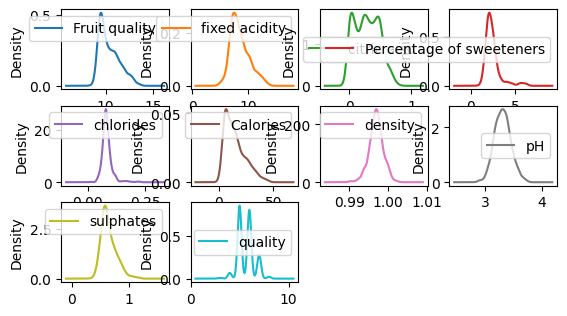

In [16]:
cocktail.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

## Histogram

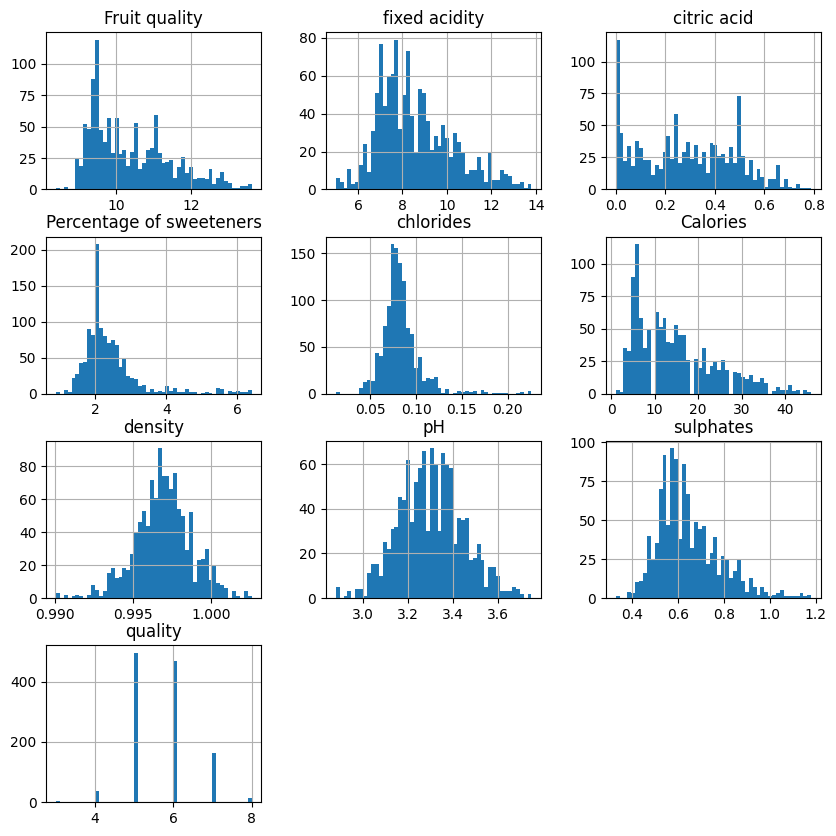

In [17]:
cocktail.hist(figsize=(10,10),bins=50)
plt.show()

# Heatmap for expressing correlation

<Axes: >

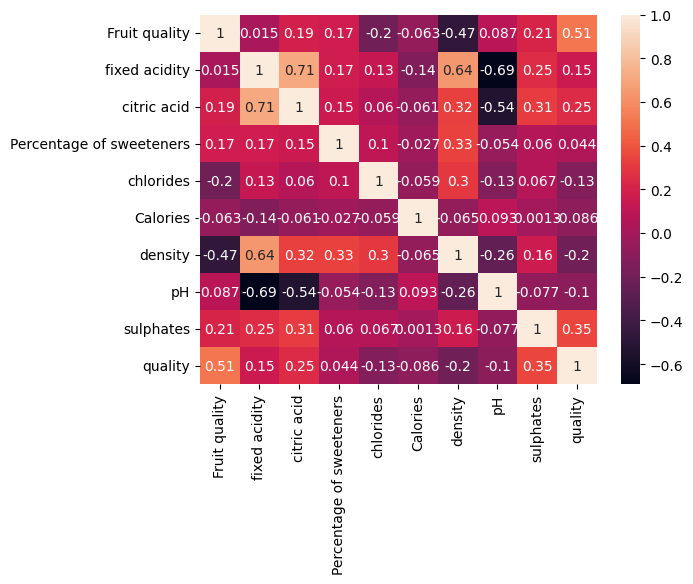

In [18]:
corr = cocktail.corr()
sns.heatmap(corr,annot=True)

## Pair Plot:

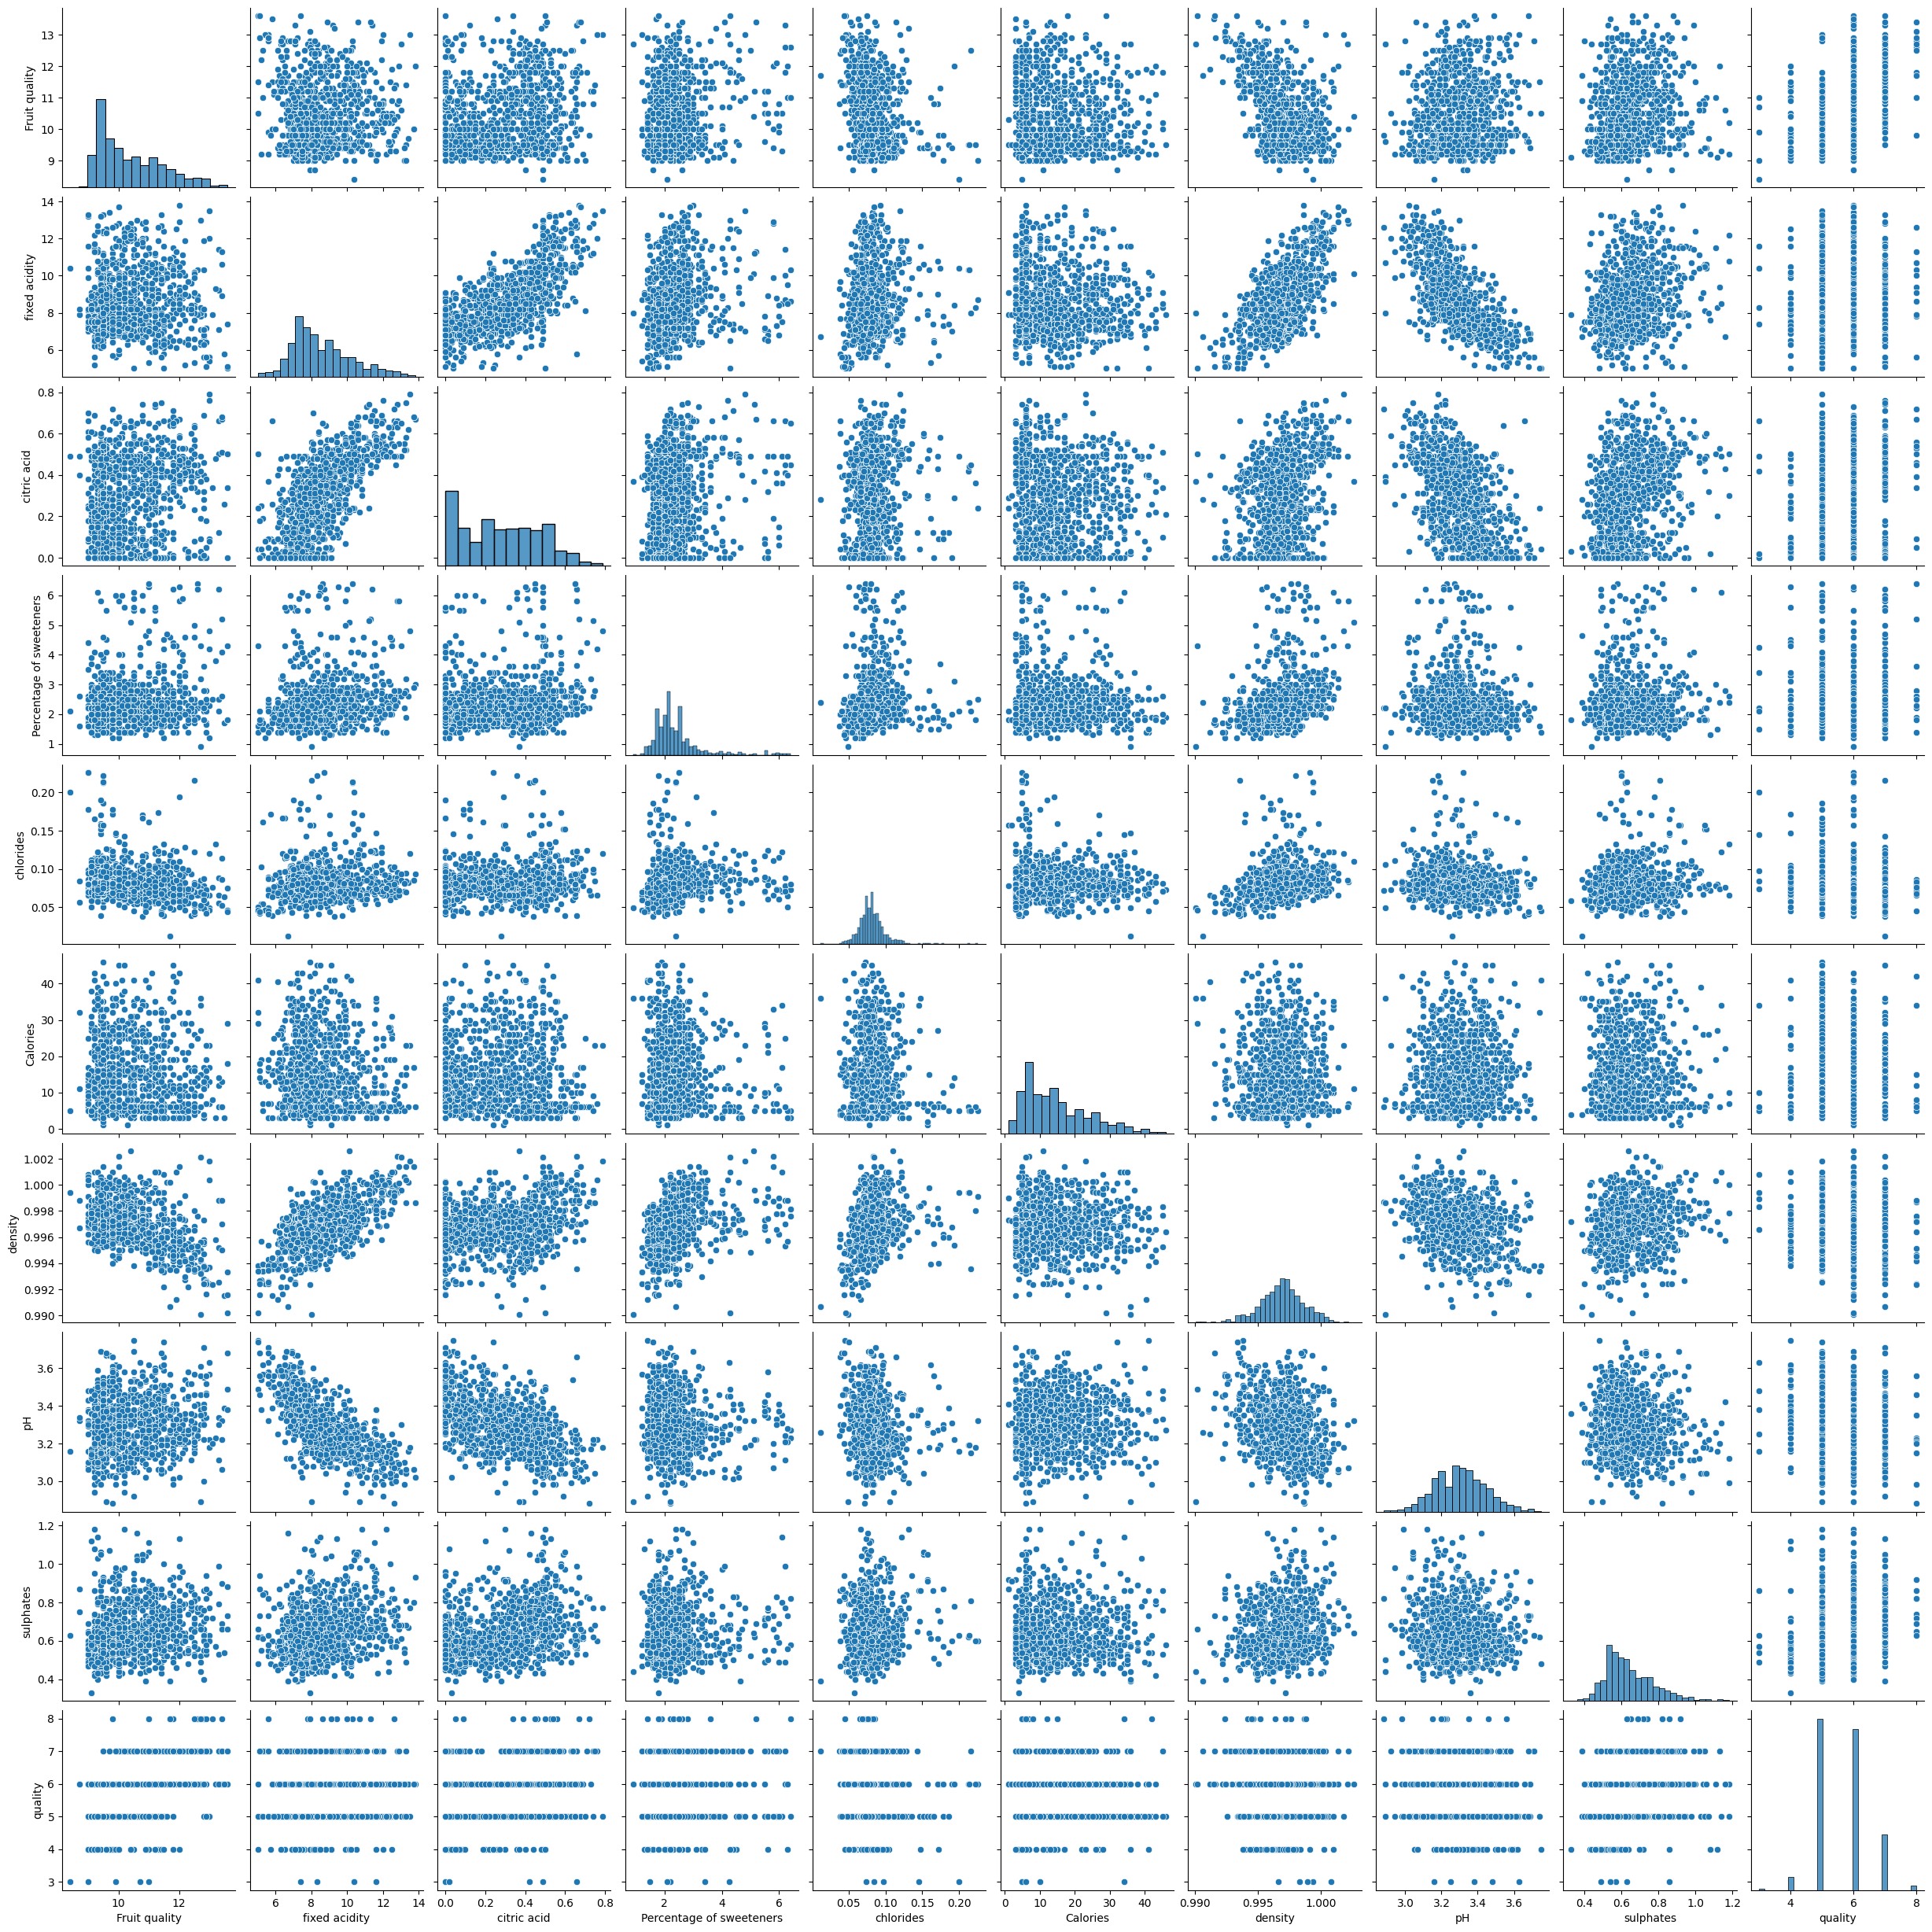

In [19]:
sns.pairplot(cocktail)

## Violinplot:

<Axes: xlabel='quality', ylabel='Percentage of sweeteners'>

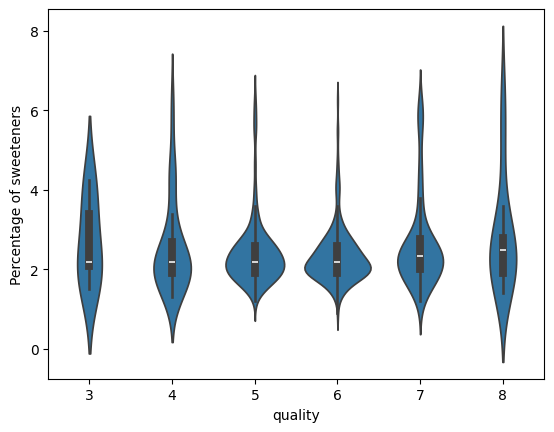

In [20]:
sns.violinplot(x='quality', y='Percentage of sweeteners', data=cocktail)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
# Prepare data
X = cocktail.drop(columns=['quality'])  # Features
Y = cocktail['quality']  # Target

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define model
model = RandomForestClassifier(random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, Y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Grid Search
param_grid = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, Y_train)
print("Best Parameters (Grid Search):", grid_search.best_params_)
print("Best Score (Grid Search):", grid_search.best_score_)

# Random Search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=5, cv=5, random_state=42)
random_search.fit(X_train, Y_train)
print("Best Parameters (Random Search):", random_search.best_params_)
print("Best Score (Random Search):", random_search.best_score_)

# Evaluate on test set
Y_pred = grid_search.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-Score
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

Cross-Validation Scores: [0.61904762 0.68783069 0.65079365 0.65079365 0.67195767]
Mean CV Accuracy: 0.656084656084656
Best Parameters (Grid Search): {'max_depth': 10, 'n_estimators': 150}
Best Score (Grid Search): 0.6613756613756614
Best Parameters (Random Search): {'n_estimators': 150, 'max_depth': 10}
Best Score (Random Search): 0.6613756613756614
Confusion Matrix:
[[ 0  0  1  1  0  0]
 [ 0  0  3  2  0  0]
 [ 0  0 82 13  1  0]
 [ 0  0 22 70  1  0]
 [ 0  0  2 16 19  0]
 [ 0  0  0  2  2  0]]
Accuracy: 0.7215189873417721
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         5
           5       0.75      0.85      0.80        96
           6       0.67      0.75      0.71        93
           7       0.83      0.51      0.63        37
           8       0.00      0.00      0.00         4

    accuracy                           0.72       237
   macro avg     

# Feature Selection

In [22]:
# Create Classification version of target variable
cocktail['goodquality'] = [1 if x >= 7 else 0 for x in cocktail['quality']]# Separate feature variables and target variable
X = cocktail.drop(['quality','goodquality'], axis = 1)
Y = cocktail['goodquality']

In [23]:
# See proportion of good vs bad
cocktail['goodquality'].value_counts()

goodquality
0    1007
1     175
Name: count, dtype: int64

In [24]:
X

,Fruit quality,fixed acidity,citric acid,Percentage of sweeteners,chlorides,Calories,density,pH,sulphates
0,9.4,7.4,0.00,1.9,0.076,11.0,0.99780,3.51,0.56
1,9.8,7.8,0.00,2.6,0.098,25.0,0.99680,3.20,0.68
2,9.8,7.8,0.04,2.3,0.092,15.0,0.99700,3.26,0.65
3,9.8,11.2,0.56,1.9,0.075,17.0,0.99800,3.16,0.58
4,9.4,7.4,0.00,1.9,0.076,11.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...
1272,11.2,5.9,0.00,1.9,0.077,25.0,0.99385,3.50,0.53
1273,9.3,7.5,0.20,2.0,0.073,34.0,0.99494,3.10,0.43
1274,11.2,7.8,0.13,2.1,0.102,17.0,0.99440,3.24,0.53
1275,9.5,8.0,0.22,2.3,0.075,13.0,0.99688,3.24,0.54


In [25]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1272    0
1273    0
1274    0
1275    0
1276    0
Name: goodquality, Length: 1182, dtype: int64


# Feature Importance

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.22647254 0.0848302  0.11571433 0.09201203 0.08370769 0.08209443
 0.10802905 0.08158689 0.12555284]


# Splitting Dataset

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [28]:
from joblib import dump
from joblib import load
import os

# LogisticRegression:

In [48]:
from sklearn.linear_model import LogisticRegression

if os.path.exists('LogisticRegression.joblib'):
  print("The model file exists.")
  model = load('LogisticRegression.joblib')
else:
  print("The model file does not exist.")
  model = LogisticRegression()

model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
dump(model, 'LogisticRegression.joblib')
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

The model file does not exist.
Accuracy Score: 0.8647887323943662


In [30]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[293  13]
 [ 35  14]]


# Using KNN:

In [31]:
from sklearn.neighbors import KNeighborsClassifier

if os.path.exists('KNeighborsClassifier.joblib'):
  print("The model file exists.")
  model = load('KNeighborsClassifier.joblib')
else:
  print("The model file does not exist.")
  model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
dump(model, 'KNeighborsClassifier.joblib')

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

The model file exists.
Accuracy Score: 0.8394366197183099


# Using SVC:

In [32]:
from sklearn.svm import SVC

if os.path.exists('SVC.joblib'):
  print("The model file exists.")
  model = load('SVC.joblib')
else:
  print("The model file does not exist.")
  model = SVC()

model.fit(X_train,Y_train)
pred_y = model.predict(X_test)
dump(model, 'SVC.joblib')

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

The model file exists.
Accuracy Score: 0.8619718309859155


# Using Decision Tree:

In [65]:
from sklearn.tree import DecisionTreeClassifier
z
if os.path.exists('DecisionTreeClassifier.joblib'):
  print("The model file exists.")
  model = load('DecisionTreeClassifier.joblib')
else:
  print("The model file does not exist.")
  model = DecisionTreeClassifier(criterion='entropy',random_state=7)

model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
dump(model, 'DecisionTreeClassifier.joblib')
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

The model file exists.
Accuracy Score: 0.8676056338028169


# Using GaussianNB:

In [34]:
from sklearn.naive_bayes import GaussianNB

if os.path.exists('gaussianNB_model.joblib'):
  print("The model file exists.")
  model3 = load('gaussianNB_model.joblib')
else:
  print("The model file does not exist.")
  model3 = GaussianNB()

model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)
dump(model3, 'gaussianNB_model.joblib')
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

The model file exists.
Accuracy Score: 0.8253521126760563


# Using Random Forest:

In [68]:
from sklearn.ensemble import RandomForestClassifier

if os.path.exists('random_forest_model.joblib'):
  print("The model file exists.")
  model2 = load('random_forest_model.joblib')
else:
    print("The model file does not exist.")
    model2 = RandomForestClassifier(random_state=1)

model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)
dump(model2, 'random_forest_model.joblib')
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

The model file does not exist.
Accuracy Score: 0.9126760563380282


# Using Xgboost:

In [36]:

import xgboost as xgb

if os.path.exists('xgb_model.xgb'):
  print("The model file exists.")
  model5 = xgb.XGBClassifier()
  model5.load_model('xgb_model.xgb')
else:
    print("The model file does not exist.")
    model5 = xgb.XGBClassifier(random_state=1)

model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

model5.save_model('xgb_model.xgb')
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

The model file exists.
Accuracy Score: 0.8985915492957747


In [37]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.8854166666666666,0.8671875,0.875,0.8828125,0.8359375,0.921875,0.8958333333333334]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.to_csv('output.csv', index=True)
result_df

,Model
Score,
0.921875,Random Forest
0.895833,Xgboost
0.885417,Logistic Regression
0.882812,Decision Tree
0.875000,SVC
0.867188,KNN
0.835938,GaussianNB


In [38]:
#Hence I will use Random Forest algorithms for training my model.